# Project: Recommender System

***Nguyen Thi Tuong Vy***

## II. EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import warnings
warnings.filterwarnings('ignore')

**Loading the data**

In [2]:
products = pd.read_csv('data/ProductNew.csv')
reviews = pd.read_csv('data/ReviewNew.zip')

## II.1. Product

In [3]:
products.head()

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [4]:
products.shape

(4373, 10)

In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4373 non-null   int64  
 1   name         4373 non-null   object 
 2   description  4370 non-null   object 
 3   rating       4373 non-null   float64
 4   price        4373 non-null   int64  
 5   list_price   4373 non-null   int64  
 6   brand        4373 non-null   object 
 7   group        4373 non-null   object 
 8   url          4373 non-null   object 
 9   image        4373 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 341.8+ KB


In [6]:
pd.options.display.float_format = '{:,.2f}'.format
products[['price', 'list_price']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,"4,373.00","2,763,501.13","5,544,076.83","7,000.00","150,000.00","487,000.00","2,680,000.00","62,690,000.00"
list_price,"4,373.00","3,893,684.92","7,900,791.25","12,000.00","279,000.00","790,000.00","3,590,000.00","82,990,000.00"


Giá bán của các sản phẩm chênh lệch khá lớn, khoảng giá trị rất rộng (khoảng từ 7,000 VNĐ cho đến 62,690,000 VNĐ)

### II.1.1. Price

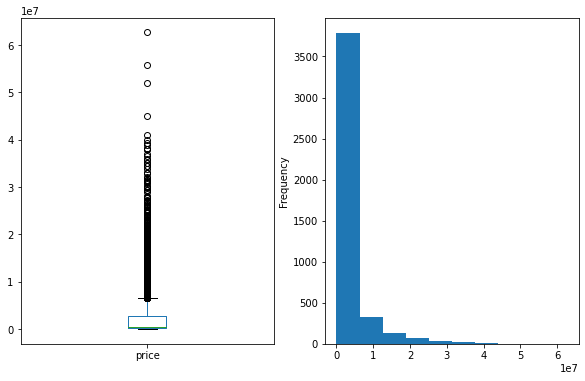

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
products.price.plot(kind='hist', bins=10, ax=ax[1])
products.price.plot(kind='box', ax=ax[0]);

Giá bán của các sản phẩm chênh lệch khá lớn, khoảng giá trị rất rộng (khoảng từ 7,000 VNĐ cho đến 62,690,000 VNĐ)

### II.1.2. Brand

**Number of products by brands**

In [8]:
brands = products.groupby('brand')['item_id'].count().sort_values(ascending=False)
brands

brand
OEM          1115
Samsung       199
Panasonic      96
LG             96
Sony           95
             ... 
Klink           1
Kplus           1
LB-LINK         1
LBLink          1
\tOEM           1
Name: item_id, Length: 521, dtype: int64

Số lượng sản phẩm của thương hiệu OEM chiếm nhiều nhất, sau đó là đến của Samsung, Panasonic, LG, Sony, ...

**Show the top 10 brands**

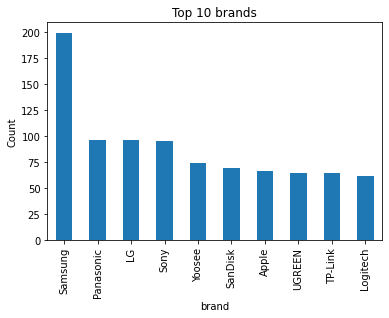

In [9]:
brands[1:11].plot(kind='bar')
plt.ylabel('Count')
plt.title('Top 10 brands');

Biểu đồ cho thấy thương hiệu Samsung có số lượng sản phẩm nhiều nhất so với 9 thương hiệu còn lại trong top 10

**The price of brands**

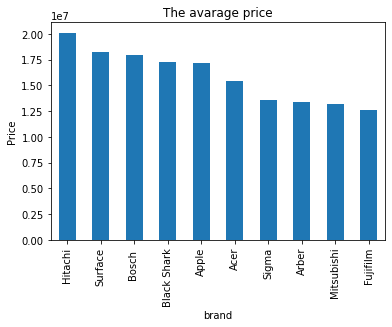

In [10]:
priceBrand = products.groupby(by='brand').mean()['price']
priceBrand.sort_values(ascending=False)[:10].plot(kind='bar')
plt.ylabel('Price')
plt.title('The avarage price');

Biểu đồ cho thấy thương hiệu Hitachi có giá bán trung bình cao nhất

### II.1.3. Rating

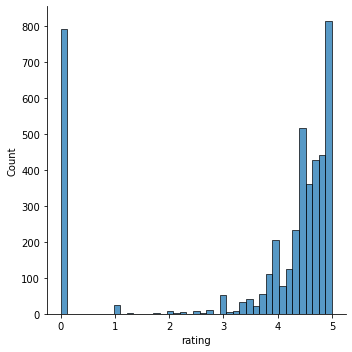

In [11]:
sns.displot(products, x='rating', kind='hist');

- Biểu đồ cho thấy các sản phẩm có lượt đánh giá là 4.8-5 chiếm nhiều nhất. Tuy nhiên, lượt đánh giá là 0 cũng chiếm không ít
- Chi tiết bên dưới đây

In [13]:
products.groupby(['rating'])['item_id'].count()

rating
0.00    790
1.00     24
1.30      2
1.80      1
2.00      7
2.10      1
2.20      2
2.30      4
2.50      7
2.60      1
2.70      6
2.80      4
3.00     52
3.10      5
3.20      9
3.30     17
3.40     15
3.50     40
3.60     23
3.70     54
3.80     61
3.90     49
4.00    204
4.10     77
4.20    125
4.30    233
4.40    191
4.50    326
4.60    361
4.70    427
4.80    442
4.90    220
5.00    593
Name: item_id, dtype: int64

## II.2. Review

In [14]:
reviews.head()

,id,customer_id,product_id,name,rating,title,content,content_clean
0,0,709310,10001012,Lân Nguyễn Hoàng,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...,lúcđầu quên thông không_đc đọc khởi tóm khởi
1,1,10701688,10001012,Nguyễn Khánh Hòa,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,...",tốt bắt hình_ảnh rộng hài_lòng tưởng
2,2,11763074,10001012,Toàn Phạm Khánh,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt...",chất_lượng chống disconect
3,3,9909549,10001012,Nguyen Quang Minh,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,...",đóng_gói cẩn_thận hài_lòng
4,4,1827148,10001012,Phạm Bá Đức,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng...",cài_đặt tốt hồng_ngoại


In [15]:
reviews.shape

(138380, 8)

In [16]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138380 entries, 0 to 138379
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             138380 non-null  int64 
 1   customer_id    138380 non-null  int64 
 2   product_id     138380 non-null  int64 
 3   name           138183 non-null  object
 4   rating         138380 non-null  int64 
 5   title          138354 non-null  object
 6   content        138380 non-null  object
 7   content_clean  138380 non-null  object
dtypes: int64(4), object(4)
memory usage: 8.4+ MB


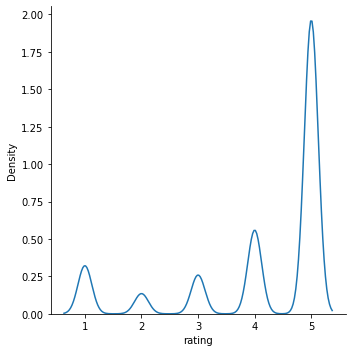

In [17]:
sns.displot(reviews, x='rating', kind='kde');

Biểu đồ cho thấy khách hàng phản hồi tốt về sản phẩm, lượt đánh giá là 5 rất cao

In [18]:
reviews.groupby(['rating']).count()

,id,customer_id,product_id,name,title,content,content_clean
rating,,,,,,,
1,13741,13741,13741,13723,13738,13741,13741
2,5768,5768,5768,5758,5765,5768,5768
3,11071,11071,11071,11053,11071,11071,11071
4,23895,23895,23895,23856,23893,23895,23895
5,83905,83905,83905,83793,83887,83905,83905


**Show the top 10 products**

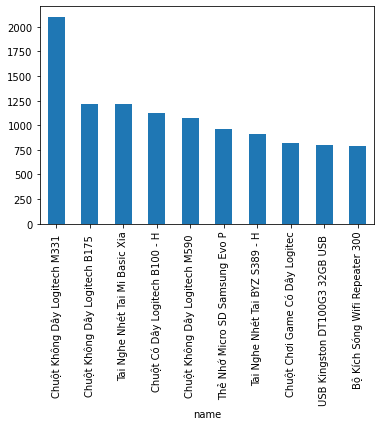

In [19]:
topProducts = reviews.groupby('product_id').count()['customer_id'].sort_values(ascending=False)[:10]
topProducts.index = products[products.item_id.isin(topProducts.index)]['name'].str[:30]
topProducts.plot(kind='bar');

Biểu đồ cho thấy, sản phẩm nhận được nhiều đánh giá nhất là "Chuột không dây Logitech M331"